In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_table("iris_data")
df

,"5.1,3.5,1.4,0.2,Iris-setosa"
0,"4.9,3.0,1.4,0.2,Iris-setosa"
1,"4.7,3.2,1.3,0.2,Iris-setosa"
2,"4.6,3.1,1.5,0.2,Iris-setosa"
3,"5.0,3.6,1.4,0.2,Iris-setosa"
4,"5.4,3.9,1.7,0.4,Iris-setosa"
...,...
144,"6.7,3.0,5.2,2.3,Iris-virginica"
145,"6.3,2.5,5.0,1.9,Iris-virginica"
146,"6.5,3.0,5.2,2.0,Iris-virginica"
147,"6.2,3.4,5.4,2.3,Iris-virginica"


Since, This table uses 1st row as a header . 
To make the data proper with correct rows and correct column names below query is applied .

In [35]:
col=["sepal length","sepal width","petal length","petal width","class"]
df=pd.read_table("iris_data",header=None,sep=",",names=col)
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In the table there are 150 rows and 5 columns . 
Out of 5 columns 4 are float data type and 1 is object data type .

In [37]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

With the help of isna() it's clear that we don't have any null values in the table.

In [38]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

With the help of the value counts we can understand that this is a balanced dataset and there are 3 types of class each has a count of 50.

In [51]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Little skewness is visible.

In [52]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


Sepal length is highly correlated with petal length and petal width since the value is 0.8 .

Petal length is highly correlated with sepal length as well as with petal width since the value is 0.8 and 0.9 respectively .

Petal Width is highly correlated with sepal length as well as with petal length since the value is 0.8 and 0.9 respectively .

Sepal width is weakly negatively correlated with sepal length , petal length and petal width .

# 2D Pairplot

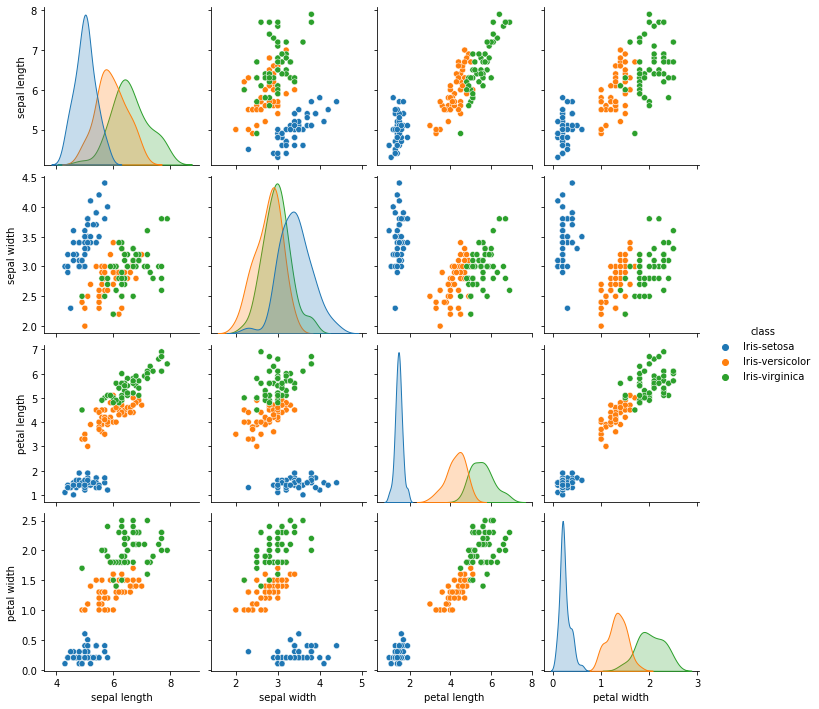

In [11]:
sns.pairplot(df,hue="class")
plt.show()

As per the graph we can see that the longest sepal length, petal length and petal width is of Iris-Setosa.Also,the shortest sepal length, petal length and petal width is of Iris-Virginia.

According to the graph there are many similarities or common points in Iris-Versicolor and Iris-Virginica . 

<AxesSubplot:>

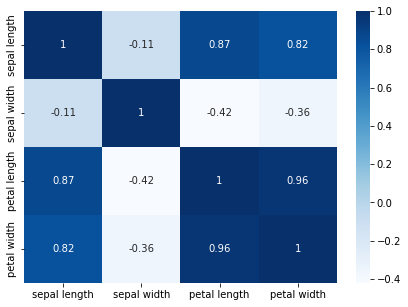

In [55]:
fig=plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap="Blues",annot=True)

* Petal length and petal width has correlation of 0.96 which shows the highest correlation.
* petal length and Sepal Length has correlation of 0.87 which shows the second highest correlation.
* Petal width and Sepal Length has correlation of 0.82 which shows the third highest correlation.

# Box Plot

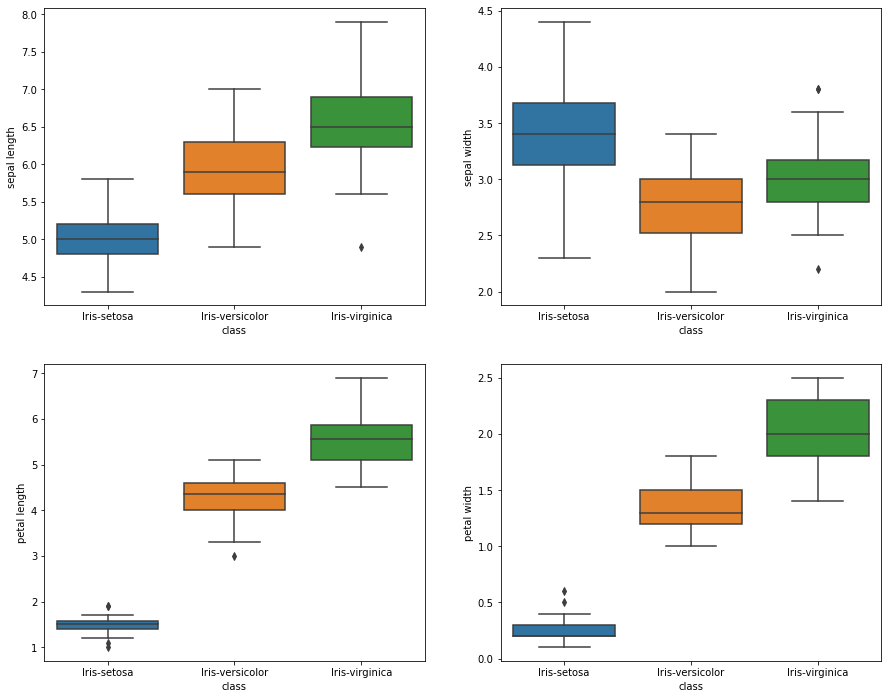

In [63]:
fig,axis=plt.subplots(2,2,figsize=(15,12))

sns.boxplot(x="class",y="sepal length",data=df,ax=axis[0,0])
sns.boxplot(x="class",y="sepal width",data=df,ax=axis[0,1])
sns.boxplot(x="class",y="petal length",data=df,ax=axis[1,0])
sns.boxplot(x="class",y="petal width",data=df,ax=axis[1,1])

plt.show()

* Iris-Setosa : It's usually having smaller features except sepal width amongst 3 classes.
* Iris-Versicolor : It is having average features amongst 3 classes.
* Iris-Virginica : It's having bigger features except sepal width amongst 3 classes.

# Violin Plot 

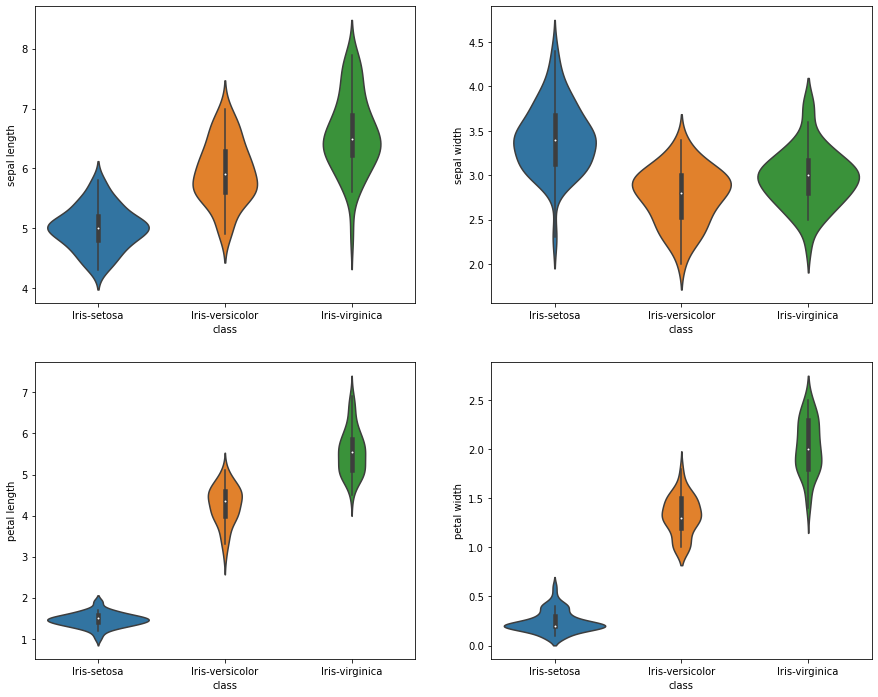

In [64]:
fig,axis=plt.subplots(2,2,figsize=(15,12))

sns.violinplot(x="class",y="sepal length",data=df,ax=axis[0,0])
sns.violinplot(x="class",y="sepal width",data=df,ax=axis[0,1])
sns.violinplot(x="class",y="petal length",data=df,ax=axis[1,0])
sns.violinplot(x="class",y="petal width",data=df,ax=axis[1,1])

plt.show()

* Data is balanced.
* Strong correlation between petal length and petal width.
* Iris-Setosa is easily separable from other flowers, even using single feature.
* Iris-Versicolor and Iris-Virginica are difficult to separate just using single feature.

# Data Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["class"]=le.fit_transform(df["class"])
df["class"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32

In [69]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Separating Features and Targets .

In [70]:
features=df.iloc[:,:-1] #features
target=df.iloc[:,-1]   #target

# Splitting the data into training and testing .

In [71]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=1,test_size=0.2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# Using MinMax Scaler

In [72]:
from sklearn.preprocessing import MinMaxScaler 
mns=MinMaxScaler()
features.iloc[:,:]=mns.fit_transform(features.iloc[:,:])
features.head()

,sepal length,sepal width,petal length,petal width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


# Standard Scaler

In [73]:
from sklearn.preprocessing import StandardScaler 
mns=StandardScaler()
features.iloc[:,:]=mns.fit_transform(features.iloc[:,:])
features.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# KNN 

KNeighborsRegressor

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [75]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)

print(mse)
print(r2)

0.011999999999999993
0.9777319587628867


In [76]:
tr=knn.score(xtrain,ytrain)
te=knn.score(xtest,ytest)
print(f"Training Accuracy :{tr}\nTesting Accuracy :{te}")

Training Accuracy :0.9676295923502768
Testing Accuracy :0.9777319587628867


In [77]:
trainac=[]
testac=[]
for i in range(1,31):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)

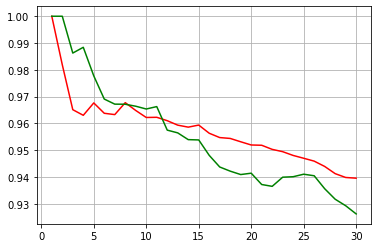

In [78]:
plt.plot(range(1,31),trainac,color="red")
plt.plot(range(1,31),testac,color="green")
plt.grid()
plt.show()


In [79]:
knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(xtrain,ytrain)

tr=knn.score(xtrain,ytrain)
te=knn.score(xtest,ytest)
print(f"Training Accuracy :{tr}\nTesting Accuracy :{te}")

Training Accuracy :0.9632714686277127
Testing Accuracy :0.9671786240269303


KNeighborsClassifier Model

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}{cm}{cr}")

Accuracy : 1.0[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The model is 100% accurate but let's check the training accuracy and testing accuracy .

In [82]:
train=knn.score(xtrain,ytrain) #training accuracy
test=knn.score(xtest,ytest) #testing accuracy
print(f"Training Accuracy : {train}\n Testing Accuracy : {test}")

Training Accuracy : 0.9583333333333334
 Testing Accuracy : 1.0


# Hyper Parameter Tuning

In [83]:
trainac=[]
testac=[]
for i in range (1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)

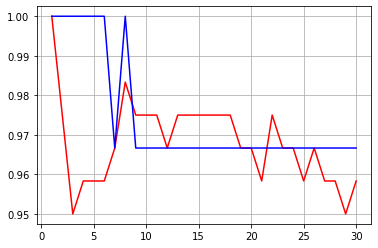

In [84]:
plt.plot(range(1,31),trainac,color="red")
plt.plot(range(1,31),testac,color="blue")
plt.grid()
plt.show()

In [85]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [86]:
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}{cm}{cr}")

Accuracy : 0.9666666666666667[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [87]:
train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)

print(f"Training Accuracy : {train}\n Testing Accuracy : {test}")

Training Accuracy : 0.9666666666666667
 Testing Accuracy : 0.9666666666666667


7 is the best K value for our model.